In [1]:
# student 1: Paul 8725 
# student 2: Johnatan 4285
# student 3: Avraham 5718 
# student 4: Stas 6349

In [2]:
#imports
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def ScaleData(trainDf,testDf,scalertype = None):#scale the dataframe according to standard or min_max scaler input
    trainDf_copy = trainDf.copy()
    testDf_copy = testDf.copy()
    train_scaler = StandardScaler()
    if(scalertype == "Minmax"):
        train_scaler = MinMaxScaler()
    trainDf_scaled = train_scaler.fit_transform(trainDf_copy)
    testDf_scaled = train_scaler.transform(testDf_copy)
    return trainDf_scaled, testDf_scaled




In [4]:
def SplitDataset(df, target_column):#split target column from dataframe
    df_copy = df.copy()
    X = df_copy.drop(columns=[target_column])
    Y = df_copy[target_column]#.values.ravel()
    return X,Y


In [5]:
def FindBestModel(X,Y,model_type,hyper_params_dict):#use grid search to find optimal parameters for input model
    X_copy = X.copy()
    Y_copy = Y.copy()
    GridSearchResult = GridSearchCV(model_type,hyper_params_dict, scoring = "r2", cv = 5) #grid search with 5 fold cross validation
    GridSearchResult.fit(X_copy,Y_copy)
    return GridSearchResult


In [6]:
def plot_feature_vector(fv1, fv2):#creates two plots from input columns
    plt.figure(figsize=(5, 3))
    plt.scatter(fv1, fv2, color='blue', label='Data Points')

    # Use the name of the Series or a brief description as labels instead of the entire Series
    xlabel = fv1.name if fv1.name else 'Feature 1'
    ylabel = fv2.name if fv2.name else 'Feature 2'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} & {ylabel}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
#read the data, and prepare arrays for best grid search results
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')
col_target='MedHouseVal'
bestScores = []
bestEstimators = []
droppedCol = []
scalerType = []

train data information:
<bound method NDFrame.head of         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1       2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2       1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3       4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4       2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   
...        ...       ...       ...        ...         ...       ...       ...   
16507   6.0000      25.0  7.760599   1.084788      1098.0  2.738155     33.78   
16508  11.0138      16.0  7.306991   1.060790       868.0  2.638298     33.64   
16509   5.4675      32.0  6.169935   1.013072      1790.0  2.924837     37.26   
16510   1.6932      37.0  4.661972   1.107042       841.0  2.369014     38.54   
16511   4.1843      12.0  6.330084   1.041783      2033

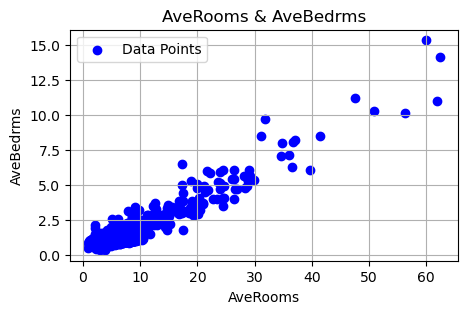

<Axes: >

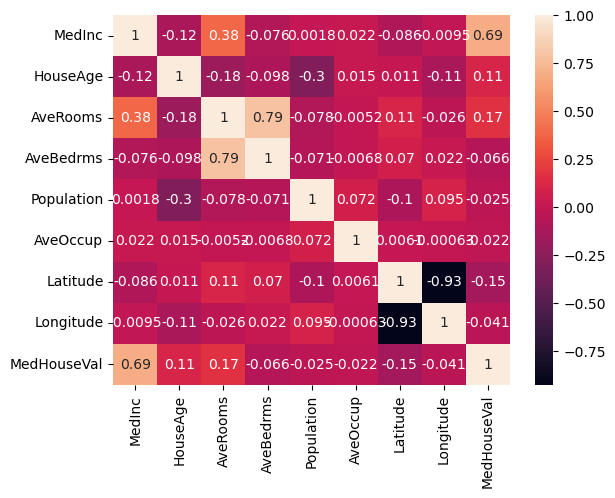

In [8]:
#EDA
print("train data information:")
print(train_data.head)
print(train_data.describe())
print(train_data.info())
print("test data information:")
print(test_data.head)
print(test_data.describe())
print(test_data.info())
plot_feature_vector(train_data["AveRooms"], train_data["AveBedrms"])
Heatmap = pd.DataFrame(train_data) #heatmap to show correlation between columns
sns.heatmap(Heatmap.corr(), annot=True)


In [9]:
#Scale and split the data - StandardScaler
train_data_scaled,test_data_scaled = ScaleData(train_data,test_data) #scale data, scalertype defaults to StandardScaler
X_train_scaled, Y_train_scaled = SplitDataset(train_data,col_target) #split the dataset

In [10]:
#prepare to apply grid search
print("GridSearch using standard scaler, and without dropping columns")
RidgeParams = {'alpha':[0.1, 2, 5, 20, 40]} #Ridge parameters for GridSearch
Ridge_model = Ridge()
#RandomForestParams = {'n_estimators':[1,2,3,4,5,6],'max_depth':[2,4,6,8,10],'min_samples_leaf': [15, 16, 17],'min_samples_split': [2, 3]}
#RandomForestParams = {'max_depth':[2,4,6,8,10,13]}
RandomForestParams = {'max_depth':[2,4,6,8,10],'min_samples_leaf': [15, 16, 17]}
RandomForestModel = RandomForestRegressor() #RandomForestRegressor()
#use grid search for ridge:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, Ridge_model, RidgeParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
#bestEstimators.append(GridSearchResult.best_estimator_)
bestEstimators.append(GridSearchResult)
droppedCol.append(False)
scalerType.append("Standard")
#use grid search for random forest:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, RandomForestModel, RandomForestParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(False)
scalerType.append("Standard")

GridSearch using standard scaler, and without dropping columns


In [11]:
#prepare to apply grid search, with dropping the highly correlated column
X_train_scaled.drop(['AveBedrms'],axis = 1,inplace=True)
print("GridSearch using standard scaler, and with dropping columns")
#use grid search for ridge:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, Ridge_model, RidgeParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(True)
scalerType.append("Standard")
#use grid search for random forest:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, RandomForestModel, RandomForestParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(True)
scalerType.append("Standard")

GridSearch using standard scaler, and with dropping columns


In [12]:
#Scale and split the data - MinMaxScaler
train_data_scaled,test_data_scaled = ScaleData(train_data,test_data,"MinMax") #scale data, scalertype defaults to StandardScaler
X_train_scaled, Y_train_scaled = SplitDataset(train_data,col_target) #split the dataset

In [13]:
#prepare to apply grid search
print("GridSearch using MinMax scaler, and without dropping columns")
#use grid search for ridge:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, Ridge_model, RidgeParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(False)
scalerType.append("MinMax")
#use grid search for random forest:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, RandomForestModel, RandomForestParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(False)
scalerType.append("MinMax")

GridSearch using MinMax scaler, and without dropping columns


In [14]:
#prepare to apply grid search
print("GridSearch using MinMax scaler, and with dropping columns")
#use grid search for ridge:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, Ridge_model, RidgeParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(True)
scalerType.append("MinMax")
#use grid search for random forest:
GridSearchResult = FindBestModel(X_train_scaled, Y_train_scaled, RandomForestModel, RandomForestParams) #use grid search to find optimal parameters for input model
bestScores.append(GridSearchResult.best_score_)
bestEstimators.append(GridSearchResult)
droppedCol.append(True)
scalerType.append("MinMax")

GridSearch using MinMax scaler, and with dropping columns


In [15]:
#create a dataframe of the best results and models
best_models_df = pd.DataFrame({"estimator":bestEstimators,"score":bestScores,"droppedCol":droppedCol,"scaler":scalerType})#, #"params":bestParams,"Result": bestResults})
best_model_index = best_models_df["score"].argmax()
print(best_models_df)

                                           estimator     score  droppedCol  \
0  GridSearchCV(cv=5, estimator=Ridge(), param_gr...  0.604915       False   
1  GridSearchCV(cv=5, estimator=RandomForestRegre...  0.767211       False   
2  GridSearchCV(cv=5, estimator=Ridge(), param_gr...  0.593503        True   
3  GridSearchCV(cv=5, estimator=RandomForestRegre...  0.766649        True   
4  GridSearchCV(cv=5, estimator=Ridge(), param_gr...  0.604915       False   
5  GridSearchCV(cv=5, estimator=RandomForestRegre...  0.767295       False   
6  GridSearchCV(cv=5, estimator=Ridge(), param_gr...  0.604915        True   
7  GridSearchCV(cv=5, estimator=RandomForestRegre...  0.766849        True   

     scaler  
0  Standard  
1  Standard  
2  Standard  
3  Standard  
4    MinMax  
5    MinMax  
6    MinMax  
7    MinMax  


In [19]:
#scale the data with the best scaler:
best_scaler = best_models_df.loc[best_model_index]["scaler"]
train_data_scaled,test_data_scaled = ScaleData(train_data,test_data,best_scaler) #scale data using best scaler
if(best_models_df.loc[best_model_index]["droppedCol"] == True): #drop the column if needed
    X_train_scaled.drop(['AveBedrms'],axis = 1,inplace=True)
    X_test_scaled.drop(['AveBedrms'],axis = 1, inplace = True)
X_train_scaled, Y_train_scaled = SplitDataset(train_data,col_target) #split the dataset
X_test_scaled, Y_test_scaled = SplitDataset(test_data,col_target)
#find the best parameters from the estimator:
#best_params = best_models_df.loc[best_model_index]["estimator"].best_params_

best_estimator = best_models_df.loc[best_model_index]["estimator"].best_estimator_
print(best_estimator)
#best_estimator = best_models_df.loc[best_model_index]["estimator"]

#fit_transform the whole train data using the best parameters:
predicted_train = best_estimator.fit(X_train_scaled,Y_train_scaled)
print("score for prediction on train is:",best_estimator.score(X_train_scaled, Y_train_scaled))
print("score for prediction on test is:",best_estimator.score(X_test_scaled, Y_test_scaled))


#transform the whole test data
#predicted_test = best_estimator.predict(X_test_scaled)
#analyze results and print them
#r2_score_final = predicted_test.r2_score(Y_test_scaled,predicted_test)
#print(r2_score_final)
                                    

#best_model = best_models_df.loc[best_model_index]["estimator"]["model"]
#best_models_df.loc[best_model_index]


RandomForestRegressor(max_depth=10, min_samples_leaf=15)
score for prediction on train is: 0.8230740143351074
score for prediction on test is: 0.7907333099237737


In [17]:
#old main code
"""for i in range(0,2):
    for j in range(0,2):
            train_predict_evaluate_rf(train_data,test_data,col_target,scaler_bol=i,model_bol=j)
fv1=train_data['AveBedrms']
fv2=train_data['AveRooms']
plot_feature_vector(fv1, fv2)
print(train_data[['AveBedrms','AveRooms']].corr(),'\n')
N_train_data=train_data.drop(['AveBedrms'],axis=1)
N_test_data=test_data.drop(['AveBedrms'],axis=1)
for i in range(0,2):
    for j in range(0,2):
            train_predict_evaluate_rf(N_train_data,N_test_data,col_target,scaler_bol=i,model_bol=j)
"""

"for i in range(0,2):\n    for j in range(0,2):\n            train_predict_evaluate_rf(train_data,test_data,col_target,scaler_bol=i,model_bol=j)\nfv1=train_data['AveBedrms']\nfv2=train_data['AveRooms']\nplot_feature_vector(fv1, fv2)\nprint(train_data[['AveBedrms','AveRooms']].corr(),'\n')\nN_train_data=train_data.drop(['AveBedrms'],axis=1)\nN_test_data=test_data.drop(['AveBedrms'],axis=1)\nfor i in range(0,2):\n    for j in range(0,2):\n            train_predict_evaluate_rf(N_train_data,N_test_data,col_target,scaler_bol=i,model_bol=j)\n"

In [18]:
#old function code

"""def train_predict_evaluate_rf(train_data, test_data, target_column,scaler_bol,model_bol):  
    # Split features and target
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column].values.ravel()
    X_test = test_data.drop(columns=[target_column])
    y_test = test_data[target_column].values.ravel()
    
    # Feature scaling
    if(scaler_bol==0):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print('StandardScaler')
    else:
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print('MinMaxScaler')

    if (model_bol==0):
        model = RandomForestRegressor()
        model.fit(X_train_scaled, y_train)
        print('RandomForestRegressor')
    else:
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        print('LinearRegression')

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    
    print(f'Training MSE: {train_mse:.2f}')
    print(f'Testing MSE: {test_mse:.2f}')
    print(f'Training R-squared: {train_r2:.2f}')
    print(f'Testing R-squared: {test_r2:.2f}')
    print('______________________________')

    # Residuals plot
    plt.figure(figsize=(5, 3))
    plt.scatter(y_test, y_test_pred - y_test)
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    #plt.show()
"""
#main code for when regression put out warnings:
"""
print("Y_train in main function print")
print(Y_train)
if(model_type == "RandomForest"):
        print(22222222222222222222222222222222222222222222)
        GridSearchResult.fit(X_copy,Y_copy)
        print(33333333333333333333333333333333333333333333)
        #GridSearchResult.fit(X_copy, y_copy.values.ravel())
        #y = y.reshape((n_samples,))
    else:
        print(44444444444444444444444444444444444444444444)
        
        print("Y_train in main function print after scaling")
print(Y_train_scaled)

    """
#best result code:
#print(best_models_df(best_models_df["score"].max()))
#print(best_models_df.loc[(best_models_df["score"].max(axis = 1)).index])
#df.sort_values('col', ascending=False)[:2].index
#print(best_models_df.loc[best_model_index])
#old scale data code
"""

    #Y_to_df = pd.DataFrame(Y)
    #Y_to_df.values.reshape(-1,1) 
    #X_scaler = StandardScaler()
    #Y_scaler = StandardScaler()
    #X_scaler = MinMaxScaler()
    #Y_scaler = MinMaxScaler()
    #print(X.describe())
    #X_scaled = X_scaler.fit_transform(X)
    #Y_scaled = Y_scaler.fit_transform(Y)
    #Y_scaled = Y_scaled.ravel()#forest regression requires 1d array and not column, so we use ravel()
    #return X_scaled, Y_scaled, X_scaler, Y_scaler
"""

#old split data code:
"""

    #print(df_copy[target_column])
    #print("this is the end of the df copy print")
    #print(df_copy[target_column].values.ravel())
    #print("this is the end of the values ravel print")    
#    X_train = train_data.drop(columns=[target_column])
#    y_train = train_data[target_column].values.ravel()
#    X_test = test_data.drop(columns=[target_column])
#    y_test = test_data[target_column].values.ravel()

"""
#old findbestmodel code:
"""
   # print(GridSearchResult)
   # best_params = GridSearchResult.best_params_
   # best_estimator = GridSearchResult.best_estimator_
   # best_score = GridSearchResult.best_score_
   # print(best_params)
   # print(best_estimator)
   # print(best_score)
    #best_estimator# best_score, 
    #print(GridSearchResult.best_estimator_)
"""

'\n   # print(GridSearchResult)\n   # best_params = GridSearchResult.best_params_\n   # best_estimator = GridSearchResult.best_estimator_\n   # best_score = GridSearchResult.best_score_\n   # print(best_params)\n   # print(best_estimator)\n   # print(best_score)\n    #best_estimator# best_score, \n    #print(GridSearchResult.best_estimator_)\n'